In [1]:
!pip install matplotlib==3.3.4
!pip install numpy==1.19.3
!pip install pandas==1.2.4
!pip install scipy==1.6.2
!pip install seaborn==0.11.1
!pip install statsmodels==0.12.2

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import pylab
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import seaborn as sns
from pandas.plotting import autocorrelation_plot

In [5]:
# importing the data
raw_csv_data = pd.read_csv("Data-Chillers.csv")

In [6]:
df_comp = raw_csv_data.copy()

In [7]:
df_comp.head()

,time,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
0,29-08-2017 11:00,-0.015871,0.353986,-0.787655,0.008144
1,29-08-2017 12:00,-0.101576,0.353986,-0.787655,-0.029860
2,29-08-2017 13:00,-0.118241,0.353986,-0.787655,-0.021717
3,29-08-2017 14:00,-0.214262,0.353986,-0.787655,0.008144
4,29-08-2017 15:00,-0.249972,0.353986,-0.787655,-0.108583


In [8]:
df_comp.describe()

,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
count,1895.000000,1895.000000,1895.000000,1895.000000
mean,-0.005885,0.003773,-0.011604,-0.026563
std,0.415492,0.820630,1.324344,0.405068
min,-1.603790,-3.115077,-3.281895,-1.468581
25%,-0.222198,-0.424783,-0.853293,-0.230738
50%,-0.022220,0.000000,0.065638,-0.065150
75%,0.190455,0.424783,0.787655,0.207664
max,1.406987,3.256671,4.397739,1.460437


In [9]:
df_comp.isna()

,time,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1890,False,False,False,False,False
1891,False,False,False,False,False
1892,False,False,False,False,False
1893,False,False,False,False,False


In [10]:
df_comp.isna().sum()

time                  0
IOT_Sensor_Reading    0
Error_Present         0
Sensor_2              0
Sensor_Value          0
dtype: int64

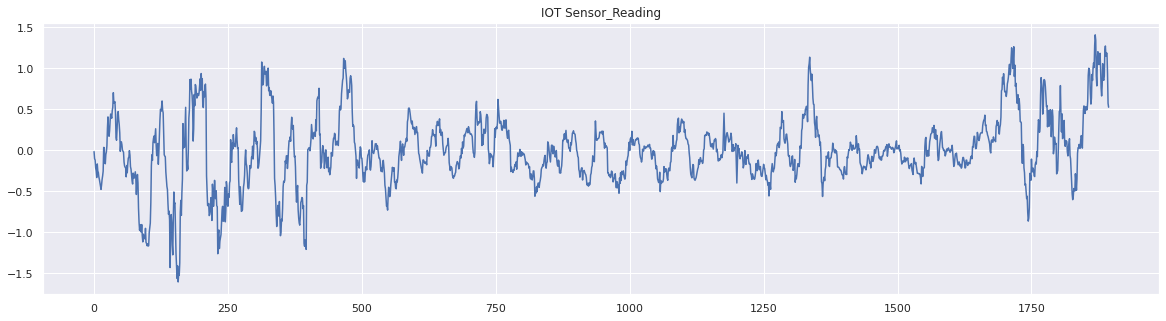

In [11]:
df_comp.IOT_Sensor_Reading.plot(figsize=(20,5), title="IOT Sensor_Reading")
plt.show()

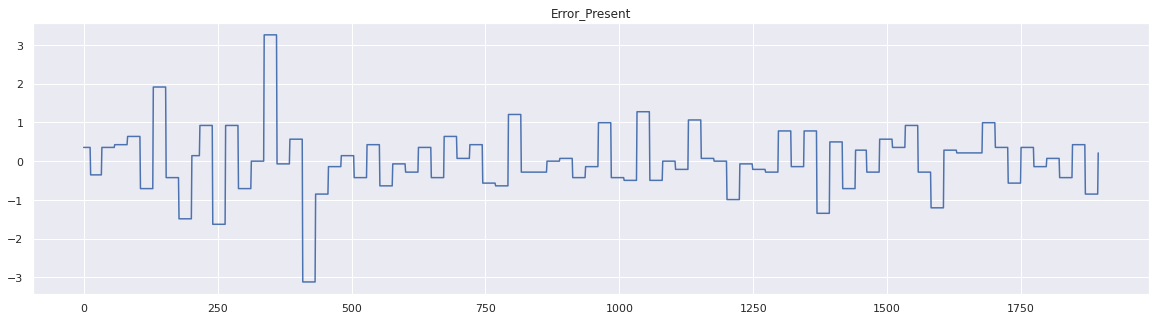

In [12]:
df_comp.Error_Present.plot(figsize=(20,5), title="Error_Present")
plt.show()

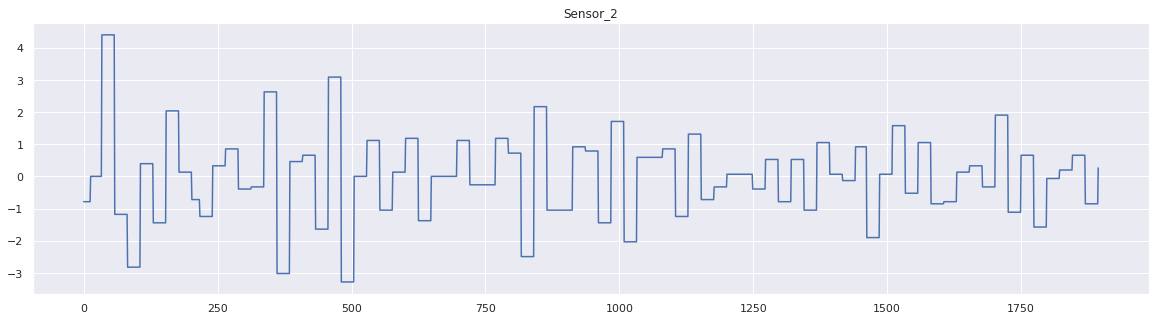

In [13]:
df_comp.Sensor_2.plot(figsize=(20,5), title="Sensor_2")
plt.show()

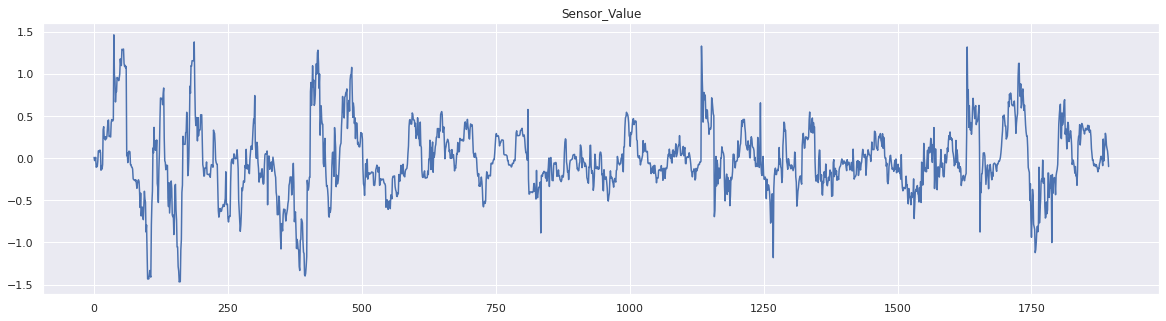

In [14]:
df_comp.Sensor_Value.plot(figsize=(20,5), title="Sensor_Value")
plt.show()

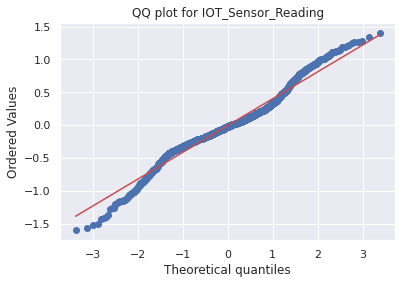

In [15]:
# The QQ plot
scipy.stats.probplot(df_comp.IOT_Sensor_Reading, plot=pylab)
plt.title("QQ plot for IOT_Sensor_Reading")
pylab.show()

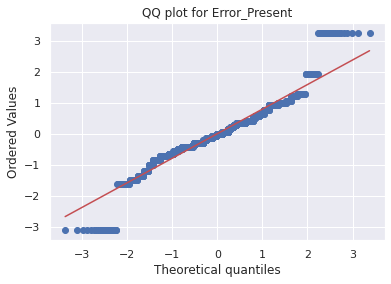

In [16]:
# The QQ plot
scipy.stats.probplot(df_comp.Error_Present, plot=pylab)
plt.title("QQ plot for Error_Present")
pylab.show()

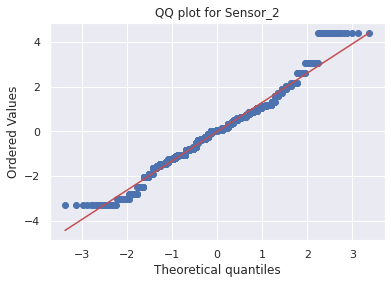

In [17]:
# The QQ plot
scipy.stats.probplot(df_comp.Sensor_2, plot=pylab)
plt.title("QQ plot for Sensor_2")
pylab.show()

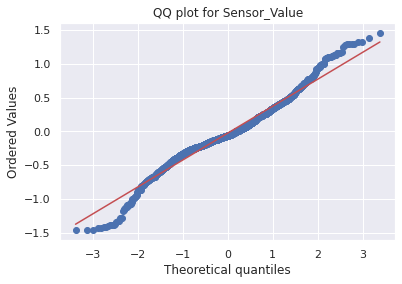

In [18]:
# The QQ plot
scipy.stats.probplot(df_comp.Sensor_Value, plot=pylab)
plt.title("QQ plot for Sensor_Value")
pylab.show()

## From Text to Date

In [19]:
# taken as text field
df_comp.time.describe()

count                 1895
unique                1895
top       30-09-2017 03:00
freq                     1
Name: time, dtype: object

In [20]:
df_comp.time = pd.to_datetime(df_comp.time, format='%d-%m-%Y %H:%M')

In [21]:
df_comp.head()

,time,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
0,2017-08-29 11:00:00,-0.015871,0.353986,-0.787655,0.008144
1,2017-08-29 12:00:00,-0.101576,0.353986,-0.787655,-0.029860
2,2017-08-29 13:00:00,-0.118241,0.353986,-0.787655,-0.021717
3,2017-08-29 14:00:00,-0.214262,0.353986,-0.787655,0.008144
4,2017-08-29 15:00:00,-0.249972,0.353986,-0.787655,-0.108583


In [22]:
df_comp.time.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    1895
unique                   1895
top       2017-09-18 16:00:00
freq                        1
first     2017-08-29 11:00:00
last      2017-11-17 00:00:00
Name: time, dtype: object

In [23]:
## Setting the index

In [24]:
df_comp.set_index("time", inplace=True)

In [25]:
df_comp

,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
time,,,,
2017-08-29 11:00:00,-0.015871,0.353986,-0.787655,0.008144
2017-08-29 12:00:00,-0.101576,0.353986,-0.787655,-0.029860
2017-08-29 13:00:00,-0.118241,0.353986,-0.787655,-0.021717
2017-08-29 14:00:00,-0.214262,0.353986,-0.787655,0.008144
2017-08-29 15:00:00,-0.249972,0.353986,-0.787655,-0.108583
...,...,...,...,...
2017-11-16 20:00:00,1.186376,-0.849566,-0.853293,0.152016
2017-11-16 21:00:00,1.182408,-0.849566,-0.853293,0.114012
2017-11-16 22:00:00,0.934023,-0.849566,-0.853293,0.084152


In [26]:
# df_comp.time.describe() # Getting an error message

## Setting the desired frequency

In [27]:
df_comp.asfreq('H')

,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
time,,,,
2017-08-29 11:00:00,-0.015871,0.353986,-0.787655,0.008144
2017-08-29 12:00:00,-0.101576,0.353986,-0.787655,-0.029860
2017-08-29 13:00:00,-0.118241,0.353986,-0.787655,-0.021717
2017-08-29 14:00:00,-0.214262,0.353986,-0.787655,0.008144
2017-08-29 15:00:00,-0.249972,0.353986,-0.787655,-0.108583
...,...,...,...,...
2017-11-16 20:00:00,1.186376,-0.849566,-0.853293,0.152016
2017-11-16 21:00:00,1.182408,-0.849566,-0.853293,0.114012
2017-11-16 22:00:00,0.934023,-0.849566,-0.853293,0.084152


In [28]:
df_comp = df_comp.asfreq('H')

## Handling the missing Values

In [29]:
df_comp.isna().sum()

IOT_Sensor_Reading    15
Error_Present         15
Sensor_2              15
Sensor_Value          15
dtype: int64

In [30]:
df_comp.IOT_Sensor_Reading = df_comp.IOT_Sensor_Reading.fillna(method="ffill")

In [31]:
df_comp.Error_Present = df_comp.Error_Present.fillna(method="bfill")

In [32]:
df_comp.Sensor_2 = df_comp.Sensor_2.fillna(method="bfill")

In [33]:
df_comp.Sensor_Value = df_comp.Sensor_Value.fillna(value=df_comp.Sensor_Value.mean())

In [34]:
df_comp.isna().sum()

IOT_Sensor_Reading    0
Error_Present         0
Sensor_2              0
Sensor_Value          0
dtype: int64

### Simplifying the dataset

In [35]:
df_comp["IoT_Reading"] = df_comp.IOT_Sensor_Reading

In [36]:
df_comp.describe()

,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value,IoT_Reading
count,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000
mean,-0.003482,0.004300,-0.013471,-0.026563,-0.003482
std,0.416235,0.817652,1.320546,0.403473,0.416235
min,-1.603790,-3.115077,-3.281895,-1.468581,-1.603790
25%,-0.222198,-0.424783,-0.853293,-0.230738,-0.222198
50%,-0.020236,0.000000,0.065638,-0.061078,-0.020236
75%,0.191844,0.424783,0.787655,0.206307,0.191844
max,1.406987,3.256671,4.397739,1.460437,1.406987


In [37]:
del df_comp['IOT_Sensor_Reading']
del df_comp['Error_Present']
del df_comp['Sensor_2']
del df_comp['Sensor_Value']

In [38]:
df_comp.describe()

,IoT_Reading
count,1910.000000
mean,-0.003482
std,0.416235
min,-1.603790
25%,-0.222198
50%,-0.020236
75%,0.191844
max,1.406987


## White Noise

In [39]:
# Sample White noise

In [40]:
wn = np.random.normal(loc=df_comp.IoT_Reading.mean(), scale=df_comp.IoT_Reading.std(), size=len(df_comp))

In [41]:
df_comp["wn"] = wn
df_comp.describe()

,IoT_Reading,wn
count,1910.000000,1910.000000
mean,-0.003482,0.014628
std,0.416235,0.419525
min,-1.603790,-1.516290
25%,-0.222198,-0.275555
50%,-0.020236,0.006700
75%,0.191844,0.309963
max,1.406987,1.263264


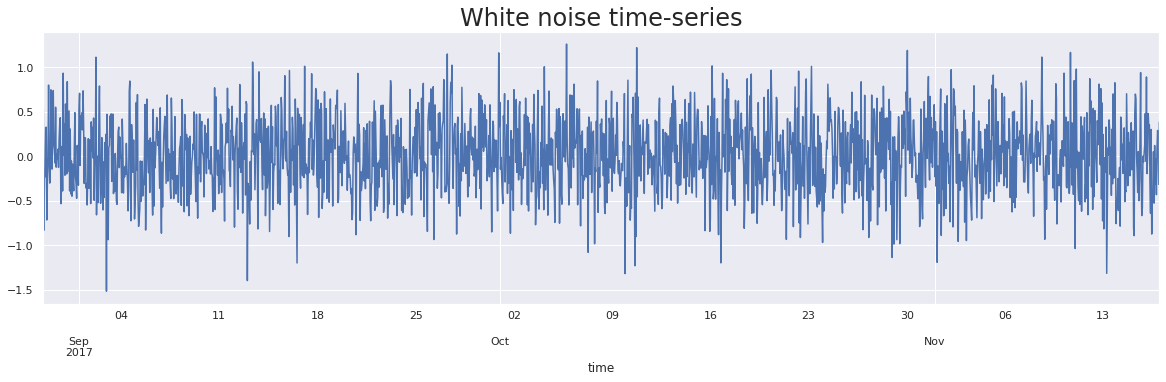

In [42]:
df_comp.wn.plot(figsize=(20,5))
plt.title("White noise time-series", size=24)
plt.show()

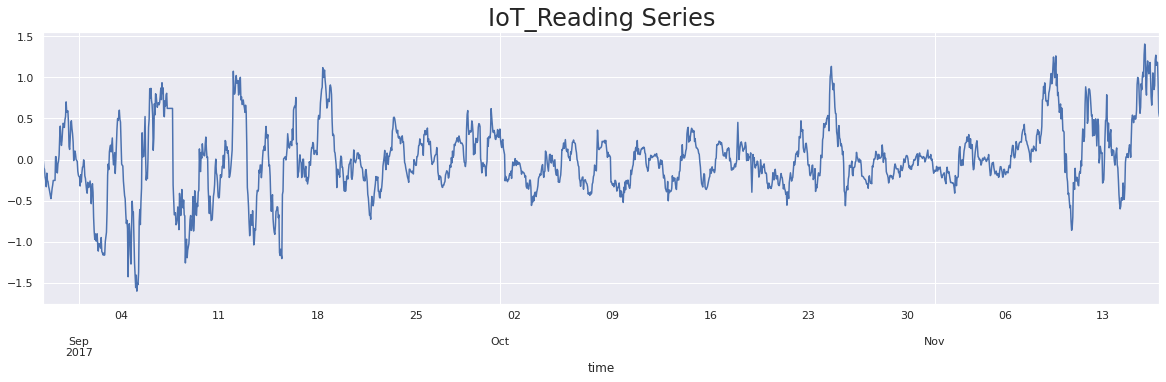

In [43]:
df_comp.IoT_Reading.plot(figsize=(20,5))
plt.title("IoT_Reading Series", size=24)
plt.show()

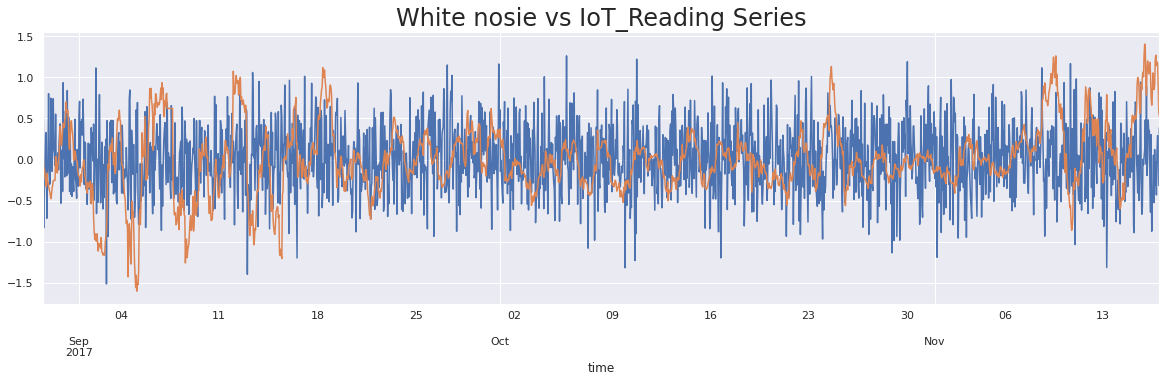

In [44]:
df_comp.wn.plot(figsize=(20,5))
df_comp.IoT_Reading.plot(figsize=(20,5))
plt.title("White nosie vs IoT_Reading Series", size=24)
plt.show()

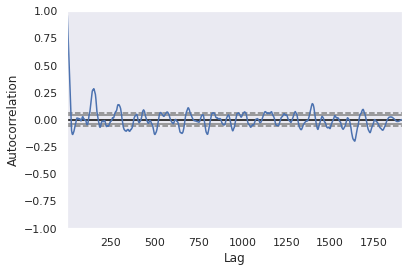

In [45]:
autocorrelation_plot(df_comp.IoT_Reading)
plt.show()  
# Plot shows +ve correlation with lag values but here no significant relationship is seen with lag values. No Cycles/Trends

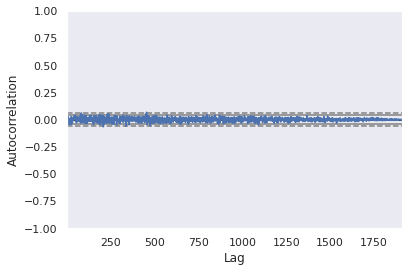

In [46]:
autocorrelation_plot(df_comp.wn)
plt.show()

## Random Walk

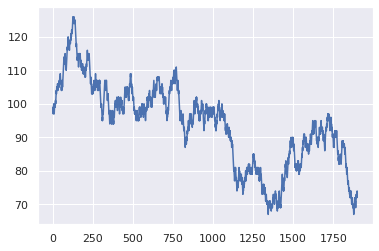

In [47]:
walk = [99]

for i in range(1900):
    # Create random noise
    noise = -1 if np.random.random() < 0.5 else 1
    walk.append(walk[-1] + noise)
    
plt.plot(walk)

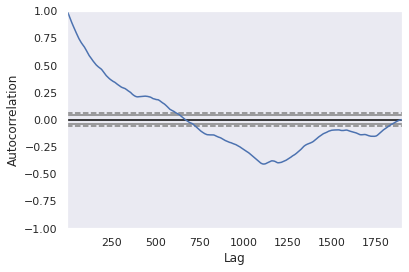

In [48]:
autocorrelation_plot(walk)
plt.show()

## Stationarity

### AD fuller test

In [49]:
sts.adfuller(df_comp.wn)

(-42.7460660984536,
 0.0,
 0,
 1909,
 {'1%': -3.4337801282776335,
  '10%': -2.5675766377428086,
  '5%': -2.8630552063395585},
 2078.0373315068355)

In [50]:
sts.adfuller(df_comp.IoT_Reading)

(-6.1107125661239845,
 9.347651207123894e-08,
 25,
 1884,
 {'1%': -3.433825707083533,
  '10%': -2.567587351898432,
  '5%': -2.8630753283581076},
 -3174.2594240489434)

In [51]:
sts.adfuller(walk)

(-1.3747904331478953,
 0.5943004684282607,
 0,
 1900,
 {'1%': -3.4337963982844437,
  '10%': -2.5675804623268697,
  '5%': -2.8630623892170872},
 5319.529646985866)

### KPSS Test

In [52]:
sts.kpss(df_comp.IoT_Reading, regression='c')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


(0.704705322948274,
 0.013117697913793268,
 26,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

In [53]:
sts.kpss(df_comp.wn, regression='c')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


(0.11022520483548917,
 0.1,
 26,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

## Seasonality

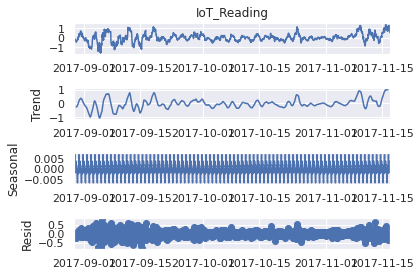

In [54]:
# Naive decomposition
# observed = Trend + Sesonal + Residual
additive = seasonal_decompose(df_comp.IoT_Reading, model="additive")
additive.plot()
plt.show()

## ACF

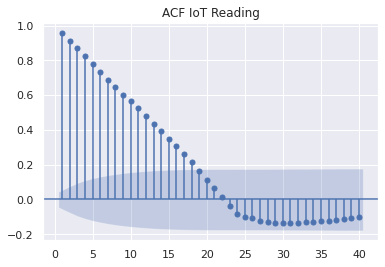

In [55]:
sgt.plot_acf(df_comp.IoT_Reading, lags=40, zero=False)
plt.title("ACF IoT Reading")
plt.show()

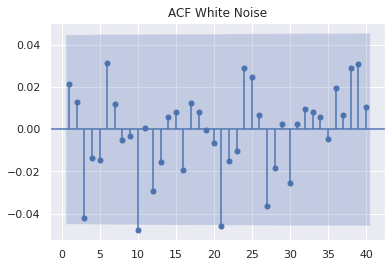

In [56]:
sgt.plot_acf(df_comp.wn, lags=40, zero=False)
plt.title("ACF White Noise")
plt.show()

## PACF

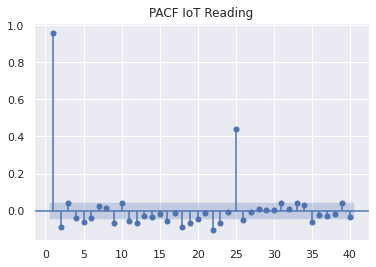

In [57]:
sgt.plot_pacf(df_comp.IoT_Reading, lags=40, zero=False, method=("ols"))
plt.title("PACF IoT Reading")
plt.show()

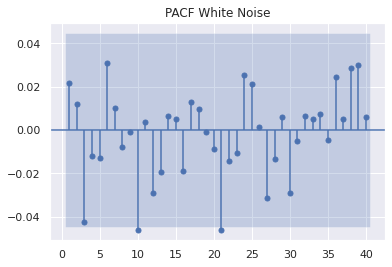

In [58]:
sgt.plot_pacf(df_comp.wn, lags=40, zero=False, method=("ols"))
plt.title("PACF White Noise")
plt.show()

## Autoregressor AR

In [59]:
# AR 1
model_ar = ARMA(df_comp.IoT_Reading, order=(1,0))
results_ar = model_ar.fit()
results_ar.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            IoT_Reading   No. Observations:                 1910
Model:                     ARMA(1, 0)   Log Likelihood                1376.098
Method:                       css-mle   S.D. of innovations              0.118
Date:                Thu, 17 Mar 2022   AIC                          -2746.195
Time:                        04:41:55   BIC                          -2729.531
Sample:                    08-29-2017   HQIC                         -2740.062
                         - 11-17-2017                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0027      0.065      0.042      0.967      -0.125       0.130
ar.L1.IoT_Reading     0.9591      0.006    149.124      0.000       0.947       0.972
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0426           +0.0000j            1.0426            0.0000
-----------------------------------------------------------------------------
"""

In [60]:
# AR 2
model_ar_2 = ARMA(df_comp.IoT_Reading, order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            IoT_Reading   No. Observations:                 1910
Model:                     ARMA(2, 0)   Log Likelihood                1383.692
Method:                       css-mle   S.D. of innovations              0.117
Date:                Thu, 17 Mar 2022   AIC                          -2759.384
Time:                        04:41:55   BIC                          -2737.165
Sample:                    08-29-2017   HQIC                         -2751.207
                         - 11-17-2017                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0017      0.060      0.029      0.977      -0.115       0.119
ar.L1.IoT_Reading     1.0445      0.023     45.846      0.000       1.000       1.089
ar.L2.IoT_Reading    -0.0890      0.023     -3.905      0.000      -0.134      -0.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0517           +0.0000j            1.0517            0.0000
AR.2           10.6828           +0.0000j           10.6828            0.0000
-----------------------------------------------------------------------------
"""

In [61]:
# AR 3
model_ar_3 = ARMA(df_comp.IoT_Reading, order=(3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            IoT_Reading   No. Observations:                 1910
Model:                     ARMA(3, 0)   Log Likelihood                1385.169
Method:                       css-mle   S.D. of innovations              0.117
Date:                Thu, 17 Mar 2022   AIC                          -2760.337
Time:                        04:41:56   BIC                          -2732.563
Sample:                    08-29-2017   HQIC                         -2750.115
                         - 11-17-2017                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0023      0.062      0.037      0.970      -0.119       0.124
ar.L1.IoT_Reading     1.0480      0.023     45.852      0.000       1.003       1.093
ar.L2.IoT_Reading    -0.1301      0.033     -3.940      0.000      -0.195      -0.065
ar.L3.IoT_Reading     0.0394      0.023      1.719      0.086      -0.006       0.084
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0472           -0.0000j            1.0472           -0.0000
AR.2            1.1275           -4.7916j            4.9225           -0.2132
AR.3            1.1275           +4.7916j            4.9225            0.2132
-----------------------------------------------------------------------------
"""

In [62]:
# AR 4
model_ar_4 = ARMA(df_comp.IoT_Reading, order=(4,0))
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            IoT_Reading   No. Observations:                 1910
Model:                     ARMA(4, 0)   Log Likelihood                1386.641
Method:                       css-mle   S.D. of innovations              0.117
Date:                Thu, 17 Mar 2022   AIC                          -2761.282
Time:                        04:41:56   BIC                          -2727.953
Sample:                    08-29-2017   HQIC                         -2749.016
                         - 11-17-2017                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0016      0.060      0.028      0.978      -0.115       0.118
ar.L1.IoT_Reading     1.0495      0.023     45.920      0.000       1.005       1.094
ar.L2.IoT_Reading    -0.1351      0.033     -4.078      0.000      -0.200      -0.070
ar.L3.IoT_Reading     0.0805      0.033      2.430      0.015       0.016       0.145
ar.L4.IoT_Reading    -0.0394      0.023     -1.717      0.086      -0.084       0.006
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0519           -0.0000j            1.0519           -0.0000
AR.2           -0.9802           -2.6855j            2.8588           -0.3057
AR.3           -0.9802           +2.6855j            2.8588            0.3057
AR.4            2.9518           -0.0000j            2.9518           -0.0000
-----------------------------------------------------------------------------
"""

In [63]:
# AR(1) Staionarity

### Log Likelyhood Test

In [64]:
def LLR_test(model_1, model_2, DF=1):
    L1 = model_1.fit().llf
    L2 = model_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [65]:
LLR_test(model_ar, model_ar_2)

0.0

In [66]:
LLR_test(model_ar_2, model_ar_3)

0.086

In [67]:
LLR_test(model_ar_3, model_ar_4)

0.086

In [68]:
df_comp['rolling_mean_IoT_Reading'] = df_comp['IoT_Reading'].rolling(window=24).mean() # Window size is 7 here
df_comp.tail()

,IoT_Reading,wn,rolling_mean_IoT_Reading
time,,,
2017-11-16 20:00:00,1.186376,0.081791,1.051537
2017-11-16 21:00:00,1.182408,0.290907,1.058811
2017-11-16 22:00:00,0.934023,0.216215,1.044494
2017-11-16 23:00:00,0.572952,-0.314861,1.009742
2017-11-17 00:00:00,0.525338,0.385941,0.975718


In [69]:
df_comp['rolling_mean_IoT_Reading'] = df_comp['IoT_Reading'].rolling(window=24).std() # Window size is 7 here
df_comp.tail()

,IoT_Reading,wn,rolling_mean_IoT_Reading
time,,,
2017-11-16 20:00:00,1.186376,0.081791,0.199033
2017-11-16 21:00:00,1.182408,0.290907,0.200550
2017-11-16 22:00:00,0.934023,0.216215,0.196473
2017-11-16 23:00:00,0.572952,-0.314861,0.203214
2017-11-17 00:00:00,0.525338,0.385941,0.213290


In [70]:
# Expanding Window

In [71]:
df_comp['rolling_mean_IoT_Reading'] = df_comp['IoT_Reading'].expanding(min_periods=1).mean()
df_comp.rolling_mean_IoT_Reading

time
2017-08-29 11:00:00   -0.015871
2017-08-29 12:00:00   -0.058724
2017-08-29 13:00:00   -0.078563
2017-08-29 14:00:00   -0.112488
2017-08-29 15:00:00   -0.139984
                         ...   
2017-11-16 20:00:00   -0.005176
2017-11-16 21:00:00   -0.004553
2017-11-16 22:00:00   -0.004061
2017-11-16 23:00:00   -0.003759
2017-11-17 00:00:00   -0.003482
Freq: H, Name: rolling_mean_IoT_Reading, Length: 1910, dtype: float64

In [72]:
df_comp['rolling_mean_IoT_Reading'] = df_comp['IoT_Reading'].expanding(min_periods=1).std()
df_comp.rolling_mean_IoT_Reading

time
2017-08-29 11:00:00         NaN
2017-08-29 12:00:00    0.060602
2017-08-29 13:00:00    0.054928
2017-08-29 14:00:00    0.081332
2017-08-29 15:00:00    0.093497
                         ...   
2017-11-16 20:00:00    0.414839
2017-11-16 21:00:00    0.415621
2017-11-16 22:00:00    0.416067
2017-11-16 23:00:00    0.416168
2017-11-17 00:00:00    0.416235
Freq: H, Name: rolling_mean_IoT_Reading, Length: 1910, dtype: float64